## ee219 project 3 Report<br>


|name|UID|
|--------|
|Jianwei Zhang|905036358|
|Xiaopei Zhang|004309991|
|yutong lu|005027184|
|hengyu lou|005035476|




## Question 1: Compute the sparsity of the movie rating dataset, where sparsity 

In [42]:
from util import *
import matplotlib.pyplot as plt




num_movies = 163949

num_user = 671



df = readData()
num_movie = np.max(df['mid'])
R = getRatingMatrix(df,num_movie)

C = np.copy(R)
C[C>0] = 1



print ("size of R", R.shape)
print (num_movies*num_user)
print (np.sum(C))
print ("sparsity:", np.sum(C)/num_movies/num_user)

size of R (671, 163949)
110009779
100004.0
sparsity: 0.000909046458497


## Question 1 Answer: 
There are a total of 163949 movies and 671 users 
possible number of ratings is 110009779
there are 100004 ratings in the dataset
Sparsity is 0.000909046458497

## Question 2: Plot a histogram showing the frequency of the rating values. To be specific, bin the rating values into intervals of width 0.5 and use the binned rating values as the horizontal axis. Count the number of entries in the ratings matrix R with rating values in the binned intervals and use this count as the vertical axis. Briefly comment on the shape of the histogram

(array([     0.,   1101.,   3326.,   1687.,   7271.,   4449.,  20064.,
         10538.,  28750.,   7723.,  15095.]),
 array([-0.25,  0.25,  0.75,  1.25,  1.75,  2.25,  2.75,  3.25,  3.75,
         4.25,  4.75,  5.25]),
 <a list of 11 Patch objects>)

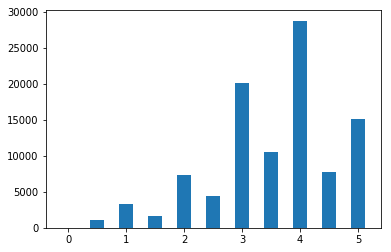

In [43]:
bins = [-0.25,0.25,0.75,1.25,1.75,2.25,2.75,3.25,3.75,4.25,4.75,5.25]
plt.hist(df['r'],bins=bins,rwidth =0.5)

## Question 2 Answer: 
According to the shape of the histogram, most of the ratings are between 3 and 4, only a few ratings are between 0.5 to 2.5

## Question 3: Plot the distribution of ratings among movies. To be specific, the X-axis should be the movie index ordered by decreasing frequency and the Y -axis should be the number of ratings the movie has received.

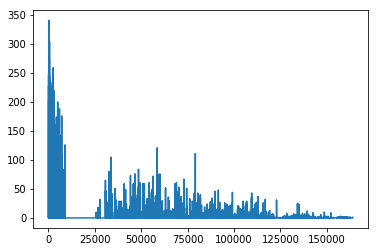

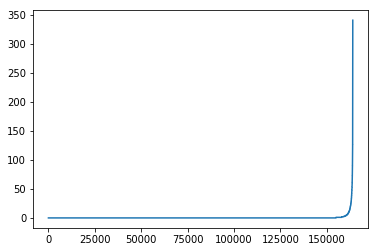

In [44]:
C = np.copy(R)
C[C>0] = 1


num_rating_per_movie = np.sum(C,axis=0)
plt.plot(num_rating_per_movie)
plt.figure()
plt.plot(np.sort(np.trim_zeros(num_rating_per_movie)))

## Question 3 Answer: 
The shape of the plot seems to be exponetial

## Question 4: Plot the distribution of ratings among users. To be specific, the X-axis should be the user index ordered by decreasing frequency and the Y -axis should be the number of movies the user have rated.

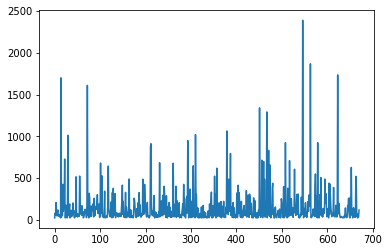

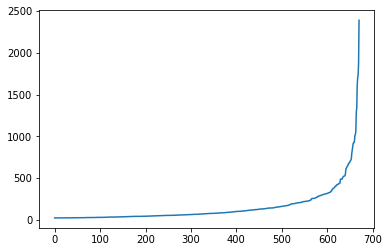

In [45]:
num_ratings_per_user = np.sum(C,axis=1)
plt.plot(num_ratings_per_user)
plt.figure()
plt.plot(np.sort(np.trim_zeros(num_ratings_per_user)))

## Question 4 Answer
The shape of the plot seems to be exponetial

## Question 5: Explain the salient features of the distribution found in question 3 and their implications for the recommendation process.

## Question 5 Answer

The number of rating for some movie is very large, indicating that these movies are rated by a lot of people. The exponetial shape of the plot shows that the top rated movies are significantlt more rated than other less rated movies. Therefore, these top movies makes great candidate for our recommendation system. 

## Question 6: Compute the variance of the rating values received by each movie. Then, bin the variance values into intervals of width 0.5 and use the binned vari- ance values as the horizontal axis. Count the number of movies with variance values in the binned intervals and use this count as the vertical axis. Briefly comment on the shape of the histogram

(array([  1.62233000e+05,   1.09900000e+03,   3.23000000e+02,
          1.20000000e+02,   7.80000000e+01,   4.20000000e+01,
          2.40000000e+01,   1.00000000e+01,   1.00000000e+01,
          8.00000000e+00,   2.00000000e+00]),
 array([-0.25,  0.25,  0.75,  1.25,  1.75,  2.25,  2.75,  3.25,  3.75,
         4.25,  4.75,  5.25]),
 <a list of 11 Patch objects>)

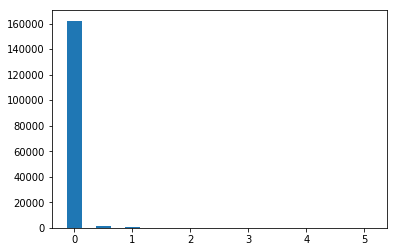

In [46]:
rating_var_per_movie = np.var(R,axis = 0)
plt.hist(rating_var_per_movie,rwidth =0.5,bins = [-0.25,0.25,0.75,1.25,1.75,2.25,2.75,3.25,3.75,4.25,4.75,5.25])

## Question 6 Answer:
The graph is not very clear, but from the data we can see that most movies have very small variance while about 500 movies have more than 1 variance.

## Question 7: Write down the formula for μu in terms of Iu and ruk

## Question 7 Answer: 

$$\mu_{u} = \dfrac{\sum_{i \in I_{u}} r_{ui}}{|I_{u}|}$$

We add up all the items' ratings in Iu and divide by how many items are in Iu. That is the average rating for user u. 

## Question 8: In plain words, explain the meaning of Iu ∩ Iv. Can Iu ∩ Iv = ∅

## Question 8 Answer: 
The intersection of Iu and Iv is the set of indices of movies that both u and v have rated. It is possible to have the intersection to be empty since it's possible for u and v to have no common rated movie. 

## Question 9: Can you explain the reason behind mean-centering the raw rat- ings (rvj − μv) in the prediction function? (Hint: Consider users who either rate all items highly or rate all items poorly and the impact of these users on the prediction function)

## Question 9 Answer
The zero-centering is a kind of normalization since each time, we have different train and test set,we need the weights to be made under a common standard. And normalization will keep all the parameters at the same scale. With this setup, user data that is extreme will not throw off the entire model. 

## Question 10: Design a k-NN collaborative filter to predict the ratings of the movies in the MovieLens dataset and evaluate it’s performance using 10-fold cross validation. Sweep k ( number of neighbors) from 2 to 100 in step sizes of 2, and for each k compute the average RMSE and average MAE obtained by averaging the RMSE and MAE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis) and average MAE (Y-axis) against k (X-axis).

In [47]:
import numpy as np
from surprise.dataset import Dataset
from surprise.reader import Reader
from util import *

reader = Reader(line_format='user item rating timestamp', sep=',',skip_lines=1)

data = Dataset.load_from_file('ml-latest-small/ratings.csv', reader=reader)


sim_options = {'name': 'pearson', 'user_base': True}

(knn_rmse, knn_mae) = train_knn(data)

using k = 2
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
using k = 4
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...


Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
using k = 24
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearso

using k = 44
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
using k = 46
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix..

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
using k = 66
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done comput

Done computing similarity matrix.
using k = 86
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
using k = 88
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computi

Text(0,0.5,'MAE mean score')

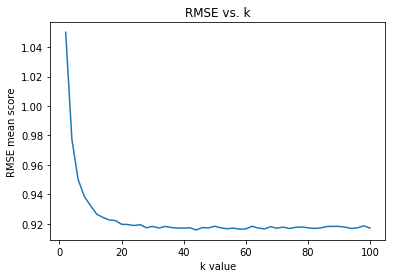

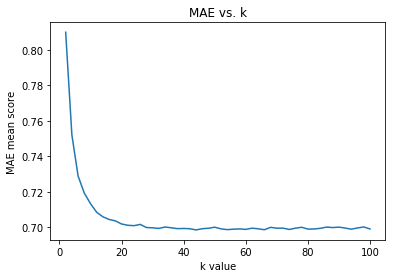

In [48]:
import matplotlib.pyplot as plt

plt.plot(range(2, 102, 2),knn_rmse)
plt.title('RMSE vs. k')
plt.xlabel('k value')
plt.ylabel('RMSE mean score')

plt.figure()

plt.plot(range(2, 102, 2),knn_mae)
plt.title('MAE vs. k')
plt.xlabel('k value')
plt.ylabel('MAE mean score')

## Question 10 Answer: 
The rmse and mae plots are shown above. At around 20, the plot starts to flat out and enter a plain

## Question 11: Use the plot from question 10, to find a ’minimum k’. Note: The term ’minimum k’ in this context means that increasing k above the minimum value would not result in a significant decrease in average RMSE or average MAE. If you get the plot correct, then ’minimum k’ would correspond to the k value for which average RMSE and average MAE converges to a steady-state value. Please report the steady state values of average RMSE and average MAE


## Question 11 Answer: 
The min k from the graph is k = 24, and the corresponding RMSE is 0.918521258745 and MAE is 0.70097040526 

## Question 12,13,14 Trimming test set with popular, popular and high variance

In [49]:
# train section

import numpy as np
from surprise.dataset import Dataset
from surprise.reader import Reader
from util import *

%load_ext autoreload
%autoreload 2

df = readData()
num_movie = 164979 
R = getRatingMatrix(df,num_movie)

reader = Reader(line_format='user item rating timestamp', sep=',',skip_lines=1)

data = Dataset.load_from_file('ml-latest-small/ratings.csv', reader=reader)


sim_options = {'name': 'pearson', 'user_base': True}

knn_trim_rmse_list = train_trim_knn(data,R)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
using k = 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0588
RMSE: 1.0446
RMSE: 1.0789
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0529
RMSE: 1.0140
RMSE: 1.0353
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0639
RMSE: 1.0285
RMSE: 1.0616
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0715
RMSE: 1.0392
RMSE: 1.0067
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0543
RMSE: 1.0351
RMSE: 1.0404
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0519
RMSE: 1.0192
RMSE: 0.9806
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0772
RMSE: 1.0480
RMSE: 1.0781
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.059

RMSE: 0.9289
RMSE: 0.9353
RMSE: 0.9346
using k = 16
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9271
RMSE: 0.9531
RMSE: 0.9098
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9150
RMSE: 0.9340
RMSE: 0.8968
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9172
RMSE: 0.9501
RMSE: 0.8526
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9102
RMSE: 0.9421
RMSE: 0.8307
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9022
RMSE: 0.9412
RMSE: 0.8489
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9151
RMSE: 0.9176
RMSE: 0.8894
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9082
RMSE: 0.9353
RMSE: 0.9169
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9154
RMSE: 0.9352
RMSE: 0.8858
Computing the pearso

RMSE: 0.9106
RMSE: 0.9195
RMSE: 0.9049
using k = 30
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9126
RMSE: 0.9572
RMSE: 0.8645
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9019
RMSE: 0.9354
RMSE: 0.8883
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9015
RMSE: 0.9288
RMSE: 0.8356
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8883
RMSE: 0.9444
RMSE: 0.8307
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9035
RMSE: 0.9361
RMSE: 0.8111
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9169
RMSE: 0.9341
RMSE: 0.8843
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8962
RMSE: 0.9328
RMSE: 0.8791
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9121
RMSE: 0.9298
RMSE: 0.8895
Computing the pearso

RMSE: 0.9031
RMSE: 0.9532
RMSE: 0.8897
using k = 44
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9070
RMSE: 0.9504
RMSE: 0.8864
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8880
RMSE: 0.9329
RMSE: 0.8837
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9063
RMSE: 0.9255
RMSE: 0.8965
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8986
RMSE: 0.9228
RMSE: 0.8446
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9341
RMSE: 0.9471
RMSE: 0.9323
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8919
RMSE: 0.9295
RMSE: 0.8403
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9062
RMSE: 0.9419
RMSE: 0.8514
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9009
RMSE: 0.9272
RMSE: 0.8622
Computing the pearso

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9180
RMSE: 0.9270
RMSE: 0.8841
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9090
RMSE: 0.9117
RMSE: 0.9168
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9043
RMSE: 0.9205
RMSE: 0.8495
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9148
RMSE: 0.9424
RMSE: 0.8433
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9126
RMSE: 0.9373
RMSE: 0.8720
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8951
RMSE: 0.9582
RMSE: 0.8135
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8923
RMSE: 0.9209
RMSE: 0.8967
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9077
RMSE: 0.9469
RMSE: 0.8983
Computing the pearson similarity matrix...
Done computing similarity mat

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9129
RMSE: 0.9284
RMSE: 0.9817
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8876
RMSE: 0.9453
RMSE: 0.8790
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8977
RMSE: 0.9181
RMSE: 0.8677
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9054
RMSE: 0.9444
RMSE: 0.8159
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9129
RMSE: 0.9452
RMSE: 0.8603
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8998
RMSE: 0.9307
RMSE: 0.8499
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9042
RMSE: 0.9493
RMSE: 0.8107
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9046
RMSE: 0.9253
RMSE: 0.8985
Computing the pearson similarity matrix...
Done computing similarity mat

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8900
RMSE: 0.9231
RMSE: 0.8906
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9148
RMSE: 0.9373
RMSE: 0.7929
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8908
RMSE: 0.9241
RMSE: 0.8671
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8866
RMSE: 0.9343
RMSE: 0.8645
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9299
RMSE: 0.9450
RMSE: 0.8952
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8958
RMSE: 0.9229
RMSE: 0.8315
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9022
RMSE: 0.9452
RMSE: 0.9025
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9067
RMSE: 0.9434
RMSE: 0.8908
Computing the pearson similarity matrix...
Done computing similarity mat

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9134
RMSE: 0.9302
RMSE: 0.8948
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8974
RMSE: 0.9147
RMSE: 0.8454
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9002
RMSE: 0.9365
RMSE: 0.8652
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9107
RMSE: 0.9679
RMSE: 0.8599
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8957
RMSE: 0.9278
RMSE: 0.8552
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9148
RMSE: 0.9374
RMSE: 0.8903
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8952
RMSE: 0.9188
RMSE: 0.7852
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9035
RMSE: 0.9430
RMSE: 0.8957
Computing the pearson similarity matrix...
Done computing similarity mat

min RMSE for popular trimming =  0.903268800933
min RMSE for unpopular trimming =  0.933316858228
min RMSE for high var trimming =  0.865605555229


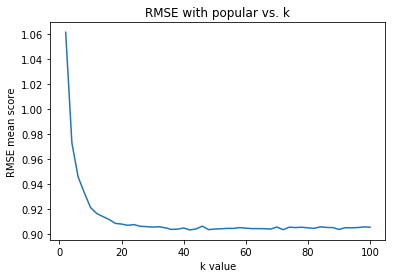

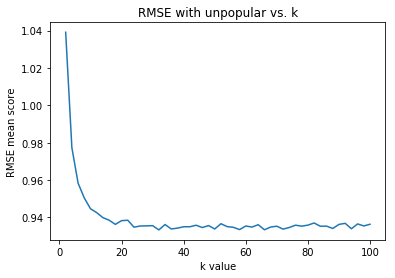

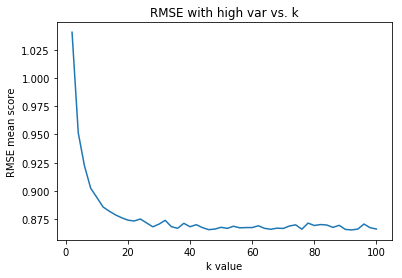

In [50]:
# plot section

import matplotlib.pyplot as plt

trim_name = ['popular','unpopular','high var']

for i in range(3):
    plt.figure()
    plt.plot(range(2, 102, 2),knn_trim_rmse_list[i])
    plt.title('RMSE with '+trim_name[i]+' vs. k')
    plt.xlabel('k value')
    plt.ylabel('RMSE mean score')
    
    print("min RMSE for " + trim_name[i]+ " trimming = ", np.min(knn_trim_rmse_list[i]))
    
    




## Question 12,13,14 Answer: 
min RMSE for popular trimming =  0.903268800933
min RMSE for unpopular trimming =  0.933316858228
min RMSE for high var trimming =  0.865605555229

## Question 15: Plot the ROC curves for the k-NN collaborative filter designed in question 10 for threshold values [2.5, 3, 3.5, 4]. For the ROC plotting use the k found in question 11. For each of the plots, also report the area under the curve (AUC) value.

In [51]:
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.model_selection import KFold
from sklearn import metrics

thresholds = [2.5, 3, 3.5, 4]
min_k = 24
kf = KFold(n_splits = 10)
sim_options = {'name': 'pearson'}
knn = KNNWithMeans(k = min_k, sim_options = sim_options)
for trainset,testset in kf.split(data):
    pass
knn.fit(trainset)
pred=knn.test(testset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


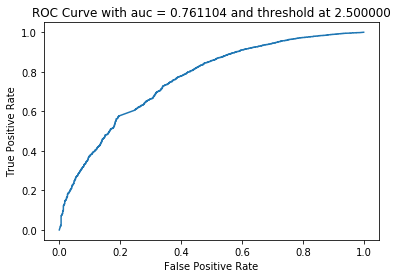

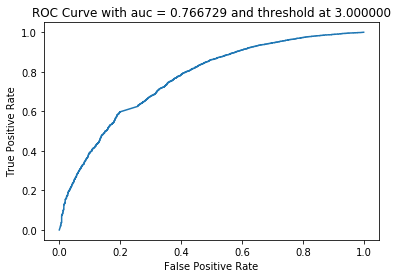

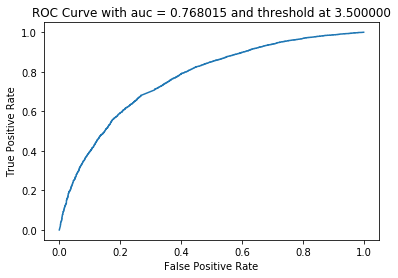

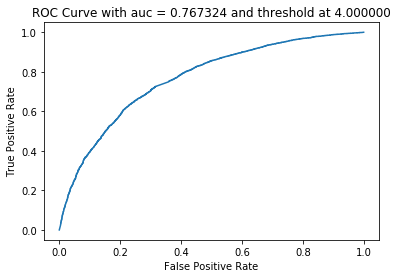

In [52]:
for i in thresholds:
    (rs,rs_pred) = ([],[])
    for j in pred:
        if j[2] >= i: rs.append(1) 
        else: rs.append(0)   
        rs_pred.append(j[3]) 
    fpr, tpr, _ = metrics.roc_curve(y_true = rs, y_score = rs_pred, pos_label=1)
    auc = metrics.roc_auc_score(y_true=rs, y_score=rs_pred)
    plt.figure()
    plt.plot(fpr,tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve with auc = %f and threshold at %f'%(auc,i))

## Question 15 Answer: 
The auc value is shown in each ROC graph title, we can see that when the threhold is at 3.0, the auc score is highest. 

## Question 16: Is the optimization problem given by equation 5 convex? Consider the optimization problem given by equation 5. For U fixed, formulate it as a least-squares problem.

## Question 16 Answer:
If U is fixed, we can take the second derivative of equation 5 with V. Then we get a matrix that is semi-positive definite when means the problem is convex. 

## Question 17: Design a NNMF-based collaborative filter to predict the ratings of the movies in the MovieLens dataset and evaluate it’s performance using 10-fold cross-validation. Sweep k (number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE and average MAE obtained by averaging the RMSE and MAE across all 10 folds. Plot the average RMSE (Y-axis) against k (X-axis) and the average MAE (Y-axis) against k (X-axis). For solving this question, use the default value for the regularization parameter.

In [53]:
import numpy as np
from surprise.dataset import Dataset
from surprise.reader import Reader
from util import *

reader = Reader(line_format='user item rating timestamp', sep=',',skip_lines=1)

data = Dataset.load_from_file('ml-latest-small/ratings.csv', reader=reader)

(nmf_rmse,nmf_mae) = train_nmf(data)

using k = 2
using k = 4
using k = 6
using k = 8
using k = 10
using k = 12
using k = 14
using k = 16
using k = 18
using k = 20
using k = 22
using k = 24
using k = 26
using k = 28
using k = 30
using k = 32
using k = 34
using k = 36
using k = 38
using k = 40
using k = 42
using k = 44
using k = 46
using k = 48
using k = 50
k-fold validation finished!


min RMSE = 0.937829 when k = 16
min MAE = 0.713261 when k = 20


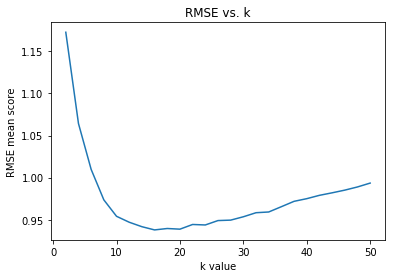

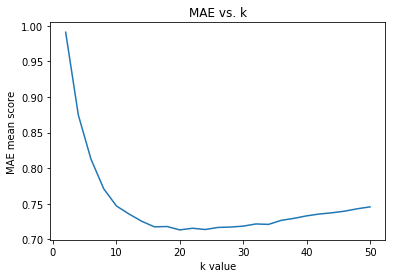

In [54]:
import matplotlib.pyplot as plt

plt.plot(range(2, 52, 2),nmf_rmse)
plt.title('RMSE vs. k')
plt.xlabel('k value')
plt.ylabel('RMSE mean score')

plt.figure()

plt.plot(range(2, 52, 2),nmf_mae)
plt.title('MAE vs. k')
plt.xlabel('k value')
plt.ylabel('MAE mean score')

print("min RMSE = %f when k = %d" % (np.min(nmf_rmse),np.argmin(nmf_rmse)*2+2))
print("min MAE = %f when k = %d" % (np.min(nmf_mae),np.argmin(nmf_mae)*2+2))


## Question 18: Use the plot from question 17, to find the optimal number of latent factors. Optimal number of latent factors is the value of k that gives the minimum average RMSE or the minimum average MAE. Please report the minimum average RMSE and MAE. Is the optimal number of latent factors same as the number of movie genres?

## Question 18 Answer: 
min RMSE = 0.937829 when k = 16
min MAE = 0.713261 when k = 20

we can choose min K to be 20. There are 19 genres in the data, the latent factors are pretty good classifications. 


## Question 19,20,21, run nmf with trimming

In [55]:
# train section

import numpy as np
from surprise.dataset import Dataset
from surprise.reader import Reader
from util import *

%load_ext autoreload
%autoreload 2

df = readData()
num_movie = 164979 
R = getRatingMatrix(df,num_movie)

reader = Reader(line_format='user item rating timestamp', sep=',',skip_lines=1)

data = Dataset.load_from_file('ml-latest-small/ratings.csv', reader=reader)


nmf_trim_rmse_list = train_trim_nmf(data,R)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
using k = 2
RMSE: 1.1625
RMSE: 1.1715
RMSE: 1.1623
RMSE: 1.1731
RMSE: 1.1880
RMSE: 1.1977
RMSE: 1.1820
RMSE: 1.1795
RMSE: 1.1712
RMSE: 1.1755
RMSE: 1.1680
RMSE: 1.1440
RMSE: 1.1881
RMSE: 1.1674
RMSE: 1.1971
RMSE: 1.1532
RMSE: 1.1857
RMSE: 1.1436
RMSE: 1.1785
RMSE: 1.2186
RMSE: 1.1997
RMSE: 1.1829
RMSE: 1.1824
RMSE: 1.1702
RMSE: 1.1759
RMSE: 1.1740
RMSE: 1.2199
RMSE: 1.1726
RMSE: 1.1705
RMSE: 1.1883
using k = 4
RMSE: 1.0555
RMSE: 1.0979
RMSE: 1.0419
RMSE: 1.0632
RMSE: 1.0970
RMSE: 1.0261
RMSE: 1.0412
RMSE: 1.0857
RMSE: 1.0090
RMSE: 1.0637
RMSE: 1.0846
RMSE: 1.0288
RMSE: 1.0711
RMSE: 1.0800
RMSE: 1.0342
RMSE: 1.0551
RMSE: 1.0886
RMSE: 1.0387
RMSE: 1.0599
RMSE: 1.0581
RMSE: 1.1242
RMSE: 1.0568
RMSE: 1.1004
RMSE: 1.0263
RMSE: 1.0522
RMSE: 1.0565
RMSE: 1.0994
RMSE: 1.0699
RMSE: 1.0888
RMSE: 1.0396
using k = 6
RMSE: 0.9940
RMSE: 1.0408
RMSE: 0.9841
RMSE: 1.0029
RMSE: 1.0301
RMSE: 0.9714
RMSE: 0.9795
RMSE:

RMSE: 0.9725
RMSE: 0.9829
RMSE: 0.9666
RMSE: 0.9654
RMSE: 0.9885
RMSE: 0.9153
RMSE: 0.9628
RMSE: 1.0205
RMSE: 0.9059
RMSE: 0.9838
RMSE: 0.9838
RMSE: 0.9940
RMSE: 0.9825
RMSE: 0.9999
RMSE: 0.9171
RMSE: 0.9645
RMSE: 0.9861
RMSE: 0.9356
RMSE: 0.9500
RMSE: 1.0165
RMSE: 0.8695
RMSE: 0.9568
RMSE: 0.9916
RMSE: 0.9269
RMSE: 0.9763
RMSE: 0.9872
RMSE: 0.9618
using k = 44
RMSE: 0.9648
RMSE: 1.0044
RMSE: 0.9133
RMSE: 0.9708
RMSE: 1.0054
RMSE: 0.9078
RMSE: 0.9837
RMSE: 1.0160
RMSE: 0.9176
RMSE: 0.9863
RMSE: 0.9728
RMSE: 0.9753
RMSE: 0.9643
RMSE: 0.9825
RMSE: 0.9145
RMSE: 0.9757
RMSE: 0.9808
RMSE: 0.9498
RMSE: 0.9763
RMSE: 0.9844
RMSE: 0.9535
RMSE: 0.9670
RMSE: 0.9998
RMSE: 0.9322
RMSE: 0.9570
RMSE: 0.9926
RMSE: 0.9736
RMSE: 0.9774
RMSE: 0.9863
RMSE: 0.9479
using k = 46
RMSE: 0.9960
RMSE: 0.9975
RMSE: 0.9985
RMSE: 0.9721
RMSE: 1.0077
RMSE: 0.9328
RMSE: 0.9707
RMSE: 0.9887
RMSE: 0.9703
RMSE: 0.9683
RMSE: 0.9923
RMSE: 0.9516
RMSE: 0.9941
RMSE: 1.0178
RMSE: 0.9066
RMSE: 0.9732
RMSE: 0.9901
RMSE: 1.0023

min RMSE for popular trimming =  0.921220686066
min RMSE for unpopular trimming =  0.959210950026
min RMSE for high var trimming =  0.880233016554


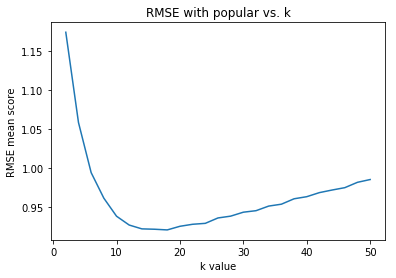

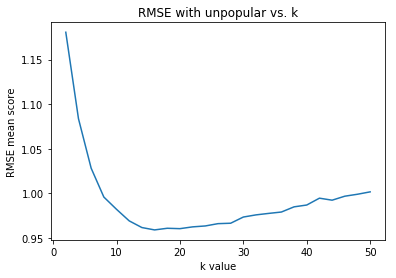

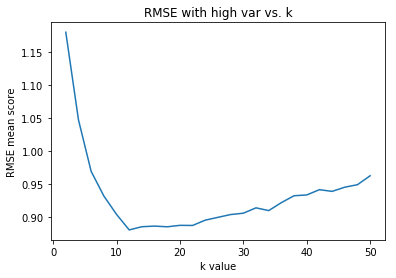

In [56]:
# plot section

import matplotlib.pyplot as plt

trim_name = ['popular','unpopular','high var']

for i in range(3):
    plt.figure()
    plt.plot(range(2, 52, 2),nmf_trim_rmse_list[i])
    plt.title('RMSE with '+trim_name[i]+' vs. k')
    plt.xlabel('k value')
    plt.ylabel('RMSE mean score')
    print("min RMSE for " + trim_name[i]+ " trimming = ", np.min(nmf_trim_rmse_list[i]))
    

## Question 19,20,21 Answer:
min RMSE for popular trimming =  0.921220686066
min RMSE for unpopular trimming =  0.959210950026
min RMSE for high var trimming =  0.880233016554

## Question 22: Plot the ROC curves for the NNMF-based collaborative filter designed in question 17 for threshold values [2.5,3,3.5,4]. For the ROC plot- ting use the optimal number of latent factors found in question 18. For each of the plots, also report the area under the curve (AUC) value.

In [57]:
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.model_selection import KFold
from sklearn import metrics
from surprise.prediction_algorithms.matrix_factorization import NMF, SVD

thresholds = [2.5, 3, 3.5, 4]
nmf_min_k = 20
kf = KFold(n_splits = 10)
nmf = NMF(n_factors = nmf_min_k)
for trainset,testset in kf.split(data):
    pass
nmf.fit(trainset)
pred=nmf.test(testset)

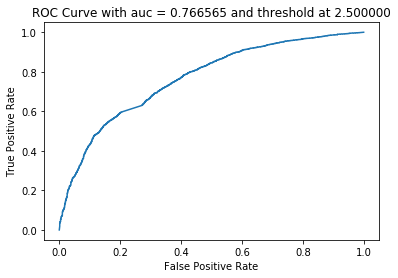

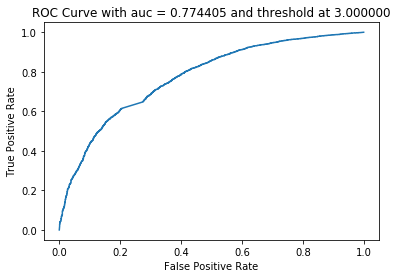

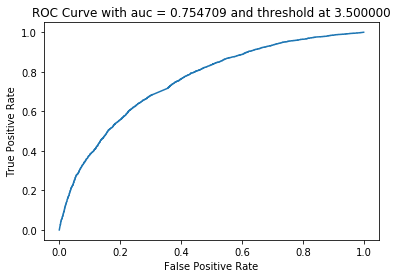

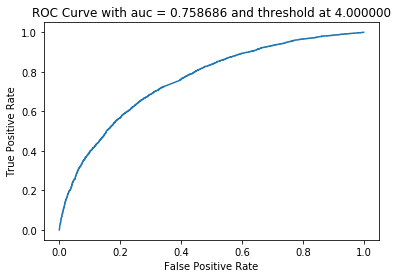

In [58]:
for i in thresholds:
    (rs,rs_pred) = ([],[])
    for j in pred:
        if j[2] >= i: rs.append(1) 
        else: rs.append(0)   
        rs_pred.append(j[3]) 
    fpr, tpr, _ = metrics.roc_curve(y_true = rs, y_score = rs_pred, pos_label=1)
    auc = metrics.roc_auc_score(y_true=rs, y_score=rs_pred)
    plt.figure()
    plt.plot(fpr,tpr)
    plt.title('ROC Curve with auc = %f and threshold at %f'%(auc,i))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

## Question 22 Answer:
The auc value is shown in each ROC graph title, we can see that when the threhold is at 3.0, the auc score is highest. 

## Question 23: Perform Non-negative matrix factorization on the ratings matrix R to obtain the factor matrices U and V , where U represents the user-latent factors interaction and V represents the movie-latent factors interaction (use k = 20). For each column of V , sort the movies in descending order and report the genres of the top 10 movies. Do the top 10 movies belong to a particular or a small collection of genre? Is there a connection between the latent factors and the movie genres?

In [59]:
from surprise import NMF
nmf = NMF(n_factors=20)
nmf.fit(data.build_full_trainset())
mov = pd.read_csv('ml-latest-small/movies.csv', names=['mid', 'title', 'genres'], header=0)

V = nmf.qi

top_num = 10
top_mov_ids = []
for i in range(20):
    col = np.argsort(V[:,i])
    top_mov_ids.append(col)
genres = mov['genres']

In [60]:
for i in range(20):
    print("genres for col %d" % i)
    for j in range(10):
        print ("-"*20)
        print (genres[top_mov_ids[i][j]])
        print ("-"*20)
    

    

genres for col 0
--------------------
Horror|Mystery|Thriller
--------------------
--------------------
Comedy
--------------------
--------------------
Action|Adventure|Children
--------------------
--------------------
Adventure|Children|Fantasy
--------------------
--------------------
Comedy|Drama
--------------------
--------------------
Action|Adventure|Animation|Comedy
--------------------
--------------------
Action|Comedy|Crime|Thriller
--------------------
--------------------
Action|Adventure|Sci-Fi|Thriller
--------------------
--------------------
Drama|Romance
--------------------
--------------------
Action|Crime|Drama
--------------------
genres for col 1
--------------------
Comedy
--------------------
--------------------
Adventure|Children|Comedy|Drama
--------------------
--------------------
Drama
--------------------
--------------------
Action|Horror|Sci-Fi
--------------------
--------------------
Adventure|Children|Drama
--------------------
-------------------

## Question 23 Answer:
From above output, we can see that the top 10 movies' genres are in a small group. For example, col 0, the genres are mostly action/adventure, which means the the first latent factor is focused on picking out action related movies. These latent factors will classifiy movies of similar genres into group. 

## Question 24: Design a MF with bias collaborative filter to predict the ratings of the movies in the MovieLens dataset and evaluate it’s performance using 10-fold cross-validation. Sweep k (number of latent factors) from 2 to 50 in step sizes of 2, and for each k compute the average RMSE and average MAE obtained by averaging the RMSE and MAE across all 10 folds. Plot the average RMSE (Y-axis) against k (X-axis) and the average MAE (Y-axis) against k (X-axis). For solving this question, use the default value for the regularization parameter.

In [73]:
import numpy as np
from surprise.dataset import Dataset
from surprise.reader import Reader
from util import *

reader = Reader(line_format='user item rating timestamp', sep=',',skip_lines=1)

data = Dataset.load_from_file('ml-latest-small/ratings.csv', reader=reader)

(svd_rmse,svd_mae) = train_svd(data)

using k = 2
using k = 4
using k = 6
using k = 8
using k = 10
using k = 12
using k = 14
using k = 16
using k = 18
using k = 20
using k = 22
using k = 24
using k = 26
using k = 28
using k = 30
using k = 32
using k = 34
using k = 36
using k = 38
using k = 40
using k = 42
using k = 44
using k = 46
using k = 48
using k = 50
k-fold validation finished!


min RMSE = 0.886838 when k = 40
min MAE = 0.681604 when k = 40


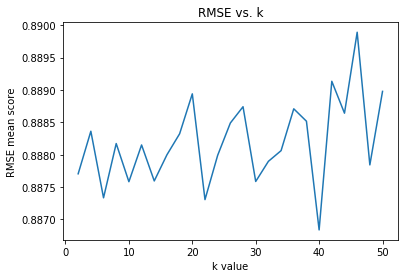

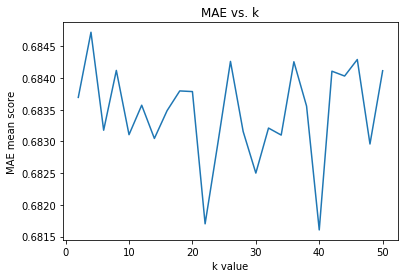

In [74]:
import matplotlib.pyplot as plt

plt.plot(range(2, 52, 2),svd_rmse)
plt.title('RMSE vs. k')
plt.xlabel('k value')
plt.ylabel('RMSE mean score')

plt.figure()

plt.plot(range(2, 52, 2),svd_mae)
plt.title('MAE vs. k')
plt.xlabel('k value')
plt.ylabel('MAE mean score')

print("min RMSE = %f when k = %d" % (np.min(svd_rmse),np.argmin(svd_rmse)*2+2))
print("min MAE = %f when k = %d" % (np.min(svd_mae),np.argmin(svd_mae)*2+2))

## Question 24 Answer:
The plots are shown above

## Question 25: Use the plot from question 24, to find the optimal number of latent factors. Optimal number of latent factors is the value of k that gives the minimum average RMSE or the minimum average MAE. Please report the minimum average RMSE and MAE.

## Question 25 Answer: 
min RMSE = 0.886838 when k = 40<br>
min MAE = 0.681604 when k = 40

We choose k = 16 as min k. 

## Question 26,27,28 

In [63]:
# train section

import numpy as np
from surprise.dataset import Dataset
from surprise.reader import Reader
from util import *

%load_ext autoreload
%autoreload 2

df = readData()
num_movie = 164979 
R = getRatingMatrix(df,num_movie)

reader = Reader(line_format='user item rating timestamp', sep=',',skip_lines=1)

data = Dataset.load_from_file('ml-latest-small/ratings.csv', reader=reader)


svd_trim_rmse_list = train_trim_svd(data,R)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
using k = 2
RMSE: 0.9000
RMSE: 0.9055
RMSE: 0.8979
RMSE: 0.8825
RMSE: 0.8847
RMSE: 0.8625
RMSE: 0.8895
RMSE: 0.9057
RMSE: 0.8123
RMSE: 0.8744
RMSE: 0.8960
RMSE: 0.8235
RMSE: 0.8875
RMSE: 0.8797
RMSE: 0.8426
RMSE: 0.8787
RMSE: 0.8866
RMSE: 0.8373
RMSE: 0.8925
RMSE: 0.8638
RMSE: 0.8800
RMSE: 0.8918
RMSE: 0.8850
RMSE: 0.8971
RMSE: 0.8872
RMSE: 0.8924
RMSE: 0.8012
RMSE: 0.8759
RMSE: 0.8976
RMSE: 0.9084
using k = 4
RMSE: 0.8777
RMSE: 0.8919
RMSE: 0.8602
RMSE: 0.8869
RMSE: 0.8881
RMSE: 0.8078
RMSE: 0.8940
RMSE: 0.8851
RMSE: 0.8438
RMSE: 0.8840
RMSE: 0.8970
RMSE: 0.8523
RMSE: 0.8844
RMSE: 0.8885
RMSE: 0.8531
RMSE: 0.8803
RMSE: 0.8851
RMSE: 0.8497
RMSE: 0.8876
RMSE: 0.8948
RMSE: 0.8075
RMSE: 0.9075
RMSE: 0.8811
RMSE: 0.9609
RMSE: 0.8805
RMSE: 0.8979
RMSE: 0.8746
RMSE: 0.8771
RMSE: 0.8887
RMSE: 0.8586
using k = 6
RMSE: 0.8836
RMSE: 0.8900
RMSE: 0.8655
RMSE: 0.8902
RMSE: 0.8908
RMSE: 0.8756
RMSE: 0.9003
RMSE:

RMSE: 0.8872
RMSE: 0.8692
RMSE: 0.9122
RMSE: 0.8822
RMSE: 0.8883
RMSE: 0.7990
RMSE: 0.8931
RMSE: 0.8960
RMSE: 0.9096
RMSE: 0.8735
RMSE: 0.8865
RMSE: 0.8018
RMSE: 0.8921
RMSE: 0.9034
RMSE: 0.8842
RMSE: 0.8986
RMSE: 0.8802
RMSE: 0.8837
RMSE: 0.8864
RMSE: 0.8909
RMSE: 0.8852
RMSE: 0.8741
RMSE: 0.9031
RMSE: 0.8108
RMSE: 0.8945
RMSE: 0.8961
RMSE: 0.8335
using k = 44
RMSE: 0.8732
RMSE: 0.9053
RMSE: 0.7943
RMSE: 0.8970
RMSE: 0.8900
RMSE: 0.8715
RMSE: 0.8721
RMSE: 0.8901
RMSE: 0.8432
RMSE: 0.8845
RMSE: 0.8738
RMSE: 0.8466
RMSE: 0.9074
RMSE: 0.9023
RMSE: 0.8743
RMSE: 0.8851
RMSE: 0.8947
RMSE: 0.8978
RMSE: 0.8882
RMSE: 0.8932
RMSE: 0.8371
RMSE: 0.8942
RMSE: 0.9001
RMSE: 0.8837
RMSE: 0.8866
RMSE: 0.8829
RMSE: 0.8429
RMSE: 0.8785
RMSE: 0.8847
RMSE: 0.8924
using k = 46
RMSE: 0.8783
RMSE: 0.8999
RMSE: 0.8620
RMSE: 0.8919
RMSE: 0.8910
RMSE: 0.8764
RMSE: 0.8840
RMSE: 0.9084
RMSE: 0.8576
RMSE: 0.8795
RMSE: 0.9036
RMSE: 0.8408
RMSE: 0.8880
RMSE: 0.8896
RMSE: 0.8451
RMSE: 0.8788
RMSE: 0.9047
RMSE: 0.8261

min RMSE for popular trimming =  0.884778688883
min RMSE for unpopular trimming =  0.889232703409
min RMSE for high var trimming =  0.847153331712


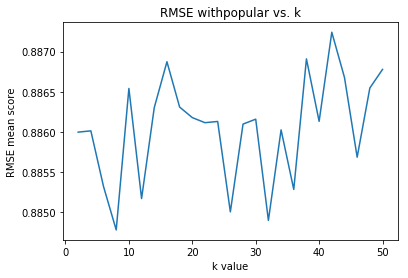

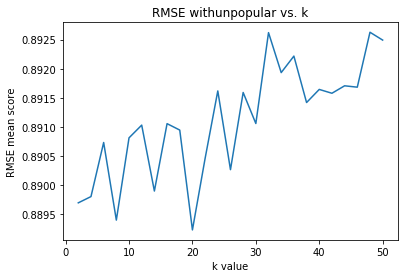

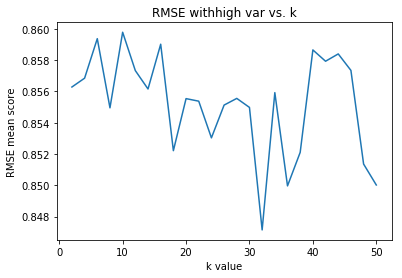

In [64]:
import matplotlib.pyplot as plt

trim_name = ['popular','unpopular','high var']

for i in range(3):
    plt.figure()
    plt.plot(range(2, 52, 2),svd_trim_rmse_list[i])
    plt.title('RMSE with'+trim_name[i]+' vs. k')
    plt.xlabel('k value')
    plt.ylabel('RMSE mean score')
    print("min RMSE for " + trim_name[i]+ " trimming = ", np.min(svd_trim_rmse_list[i]))

## Question 26,27,28 Answer: 
min RMSE for popular trimming =  0.884778688883
min RMSE for unpopular trimming =  0.889232703409
min RMSE for high var trimming =  0.847153331712

## Question 29: Plot the ROC curves for the MF with bias collaborative filter designed in question 24 for threshold values [2.5,3,3.5,4]. For the ROC plot- ting use the optimal number of latent factors found in question 25. For each of the plots, also report the area under the curve (AUC) value.

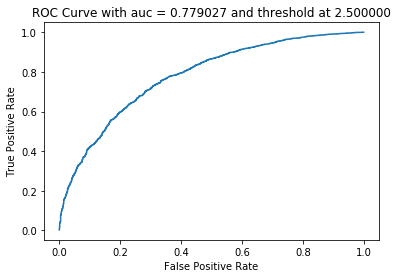

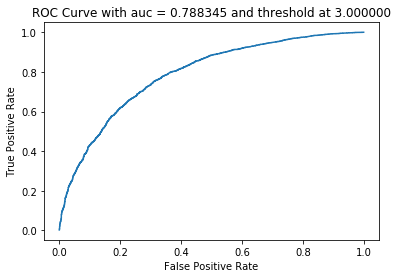

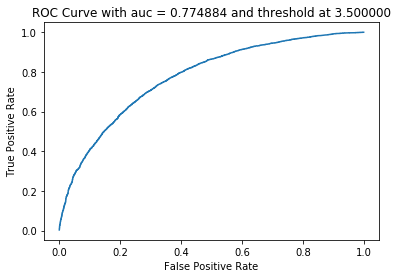

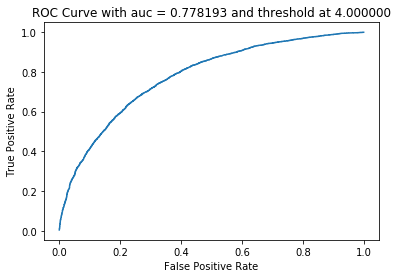

In [75]:
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.model_selection import KFold
from sklearn import metrics
from surprise.prediction_algorithms.matrix_factorization import NMF, SVD

thresholds = [2.5, 3, 3.5, 4]
svd_min_k = 40
kf = KFold(n_splits = 10)
svd = SVD(n_factors = svd_min_k)
for trainset,testset in kf.split(data):
    pass
svd.fit(trainset)
pred=svd.test(testset)

for i in thresholds:
    (rs,rs_pred) = ([],[])
    for j in pred:
        if j[2] >= i: rs.append(1) 
        else: rs.append(0)   
        rs_pred.append(j[3]) 
    fpr, tpr, _ = metrics.roc_curve(y_true = rs, y_score = rs_pred, pos_label=1)
    auc = metrics.roc_auc_score(y_true=rs, y_score=rs_pred)
    plt.figure()
    plt.plot(fpr,tpr)
    plt.title('ROC Curve with auc = %f and threshold at %f'%(auc,i))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

## Question 29 Answer: 
The auc value is shown in each ROC graph title, we can see that when the threhold is at 3.0, the auc score is highest. 

## Question 30: Design a naive collaborative filter to predict the ratings of the movies in the MovieLens dataset and evaluate it’s performance using 10-fold cross validation. Compute the average RMSE by averaging the RMSE across all 10 folds. Report the average RMSE.

In [66]:
import numpy as np
from surprise.dataset import Dataset
from surprise.reader import Reader
from util import *

df = readData()
num_movie = 164979 
R = getRatingMatrix(df,num_movie)

reader = Reader(line_format='user item rating timestamp', sep=',',skip_lines=1)

data = Dataset.load_from_file('ml-latest-small/ratings.csv', reader=reader)

print(train_naive(data,R))

3.68869926255


## Question 30 Answer:
the average Rmse = 3.68869926255

## Question 31,32,33 

In [67]:
import numpy as np
from surprise.dataset import Dataset
from surprise.reader import Reader
from util import *

%load_ext autoreload
%autoreload 2

df = readData()
num_movie = 164979 
R = getRatingMatrix(df,num_movie)

reader = Reader(line_format='user item rating timestamp', sep=',',skip_lines=1)

data = Dataset.load_from_file('ml-latest-small/ratings.csv', reader=reader)

print(train_trim_naive(data,R))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(3.7136303466017195, 3.6532010216772335, 3.9180587411431818)


## Question 31,32,33 Answer: 
the average RMSE for popular, unpopular, high var trimming are (3.7136303466017195, 3.6532010216772335, 3.9180587411431818)

## Question 34: Plot the ROC curves (threshold = 3) for the k-NN, NNMF, and MF with bias based collaborative filters in the same figure. Use the figure to compare the performance of the filters in predicting the ratings of the movies.

In [68]:
threshold = 3

for trainset,testset in kf.split(data):
    pass
print ("doing knn")
min_k = 24
kf = KFold(n_splits = 10)
sim_options = {'name': 'pearson'}
knn = KNNWithMeans(k = min_k, sim_options = sim_options)
knn.fit(trainset)
pred_knn=knn.test(testset)

print("doing nmf")
nmf_min_k = 20
nmf = NMF(n_factors = nmf_min_k)
nmf.fit(trainset)
pred_nmf=nmf.test(testset)

print("doing MF")
svd_min_k = 40
svd = SVD(n_factors = svd_min_k)
svd.fit(trainset)
pred_svd=svd.test(testset)

preds = [pred_knn, pred_nmf, pred_svd]
fprs = []
tprs = []
aucs = []
for i in range(3):
    pred = preds[i]
    rs = []
    rs_pred = []
    for j in pred:
        if j[2] >= threshold: rs.append(1) 
        else: rs.append(0)
        rs_pred.append(j[3]) 
    fpr, tpr, _ = metrics.roc_curve(y_true = rs, y_score = rs_pred, pos_label=1)
    aucs.append(metrics.roc_auc_score(y_true=rs, y_score=rs_pred))
    fprs.append(fpr)
    tprs.append(tpr)
    

doing knn
Computing the pearson similarity matrix...
Done computing similarity matrix.
doing nmf
doing MF


KNN AUC = 0.773815574657
NMF AUC = 0.762299167603
MF AUC = 0.785260659566


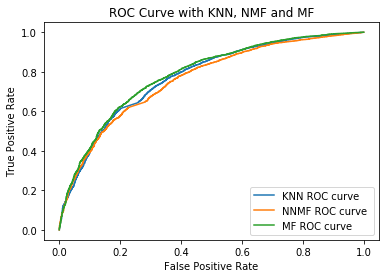

In [69]:
plt.figure()
plt.plot(fprs[0],tprs[0],label='KNN ROC curve ')
plt.plot(fprs[1],tprs[1],label='NNMF ROC curve ')
plt.plot(fprs[2],tprs[2],label='MF ROC curve ')
plt.title('ROC Curve with KNN, NMF and MF')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

print ("KNN AUC =", aucs[0])
print ("NMF AUC =", aucs[1])
print ("MF AUC =", aucs[2])

## Question 34 Answer:
From the graph, we can see that the MF curve is above the other 2 plot. And the auc score of MF is higher than others. This means MF has the best performance here. <br>

KNN AUC = 0.773815574657<br>
NMF AUC = 0.762299167603<br>
MF AUC = 0.785260659566<br>

## Question 35: Precision and Recall are defined by the mathematical expres- sions given by equations 12 and 13 respectively. Please explain the meaning of precision and recall in your own words.

## Question 35 Answer: 
precision is defined as ratio of correct prediction(recommandation) to all recommandation, this measures how precise our recommandation is for a user. <br>

recall is defined as the ratio of correct prediction(recoomandation to the num of items that the user actually liked. This measures how many predictions are inside the user's previously recorded data. 

## Question 36, 37, 38

In [70]:
import numpy as np
from surprise.dataset import Dataset
from surprise.reader import Reader
from util import *

reader = Reader(line_format='user item rating timestamp', sep=',',skip_lines=1)

data = Dataset.load_from_file('ml-latest-small/ratings.csv', reader=reader)

threshold = 3

min_k = 24
sim_options = {'name': 'pearson'}
knn = KNNWithMeans(k = min_k, sim_options = sim_options)

nmf_min_k = 20
nmf = NMF(n_factors = nmf_min_k)

svd_min_k = 40
svd = SVD(n_factors = svd_min_k)

models = [knn,nmf,svd]



precisions,recalls = calculate_precision_recall(models,threshold,data)








Computing the pearson similarity matrix...
Done computing similarity matrix.
doing nmf
doing svd
Computing the pearson similarity matrix...
Done computing similarity matrix.
doing nmf
doing svd
Computing the pearson similarity matrix...
Done computing similarity matrix.
doing nmf
doing svd
Computing the pearson similarity matrix...
Done computing similarity matrix.
doing nmf
doing svd
Computing the pearson similarity matrix...
Done computing similarity matrix.
doing nmf
doing svd
Computing the pearson similarity matrix...
Done computing similarity matrix.
doing nmf
doing svd
Computing the pearson similarity matrix...
Done computing similarity matrix.
doing nmf
doing svd
Computing the pearson similarity matrix...
Done computing similarity matrix.
doing nmf
doing svd
Computing the pearson similarity matrix...
Done computing similarity matrix.
doing nmf
doing svd
Computing the pearson similarity matrix...
Done computing similarity matrix.
doing nmf
doing svd
Computing the pearson similari

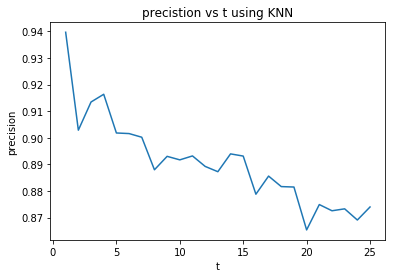

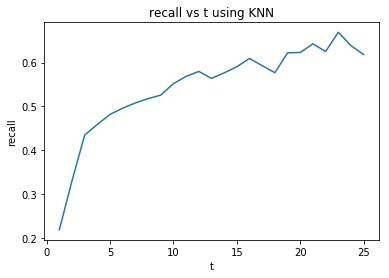

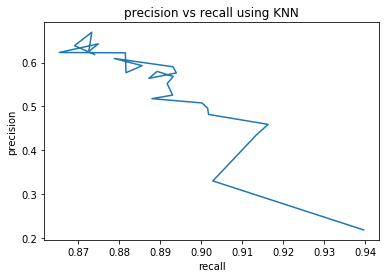

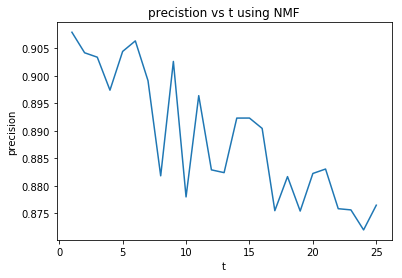

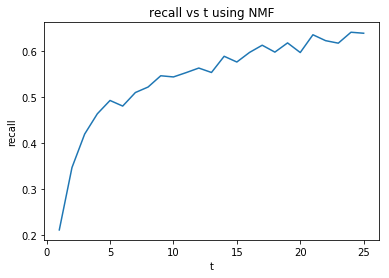

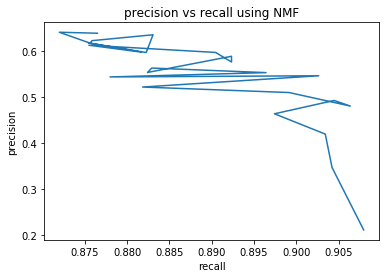

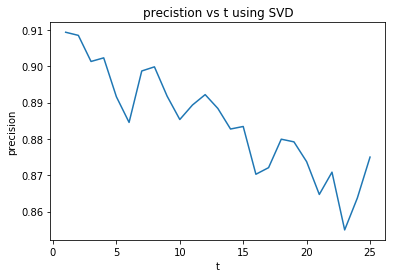

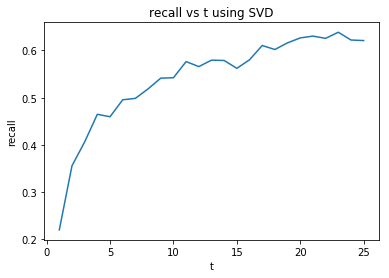

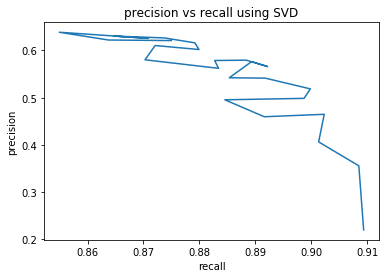

In [71]:
import matplotlib.pyplot as plt

for i in range(len(model_names)):
    ts = range(1, 26)
    
    plt.figure()
    
    plt.plot(range(1, 26), precisions[i])
    plt.title("precistion vs t using "+model_names[i])
    plt.xlabel('t')
    plt.ylabel("precision")

    plt.figure()

    plt.plot(range(1, 26), recalls[i])
    plt.title("recall vs t using "+model_names[i])
    plt.xlabel('t')
    plt.ylabel("recall")
    
    plt.figure()
    
    plt.plot(precisions[i], recalls[i])
    plt.title("precision vs recall using "+model_names[i])
    plt.xlabel('recall')
    plt.ylabel("precision")
    
    

## Question 36,37,38 Answer: 

For the precision vs t plot of KNN, NMF and MF, we can see a general decreasing of precision as t increases. This should indicate using the few top recommandation results in a better performance. <br>

For the recall vs t plot of KNN, NMF and MF, we see a increase in recall as t increases. This indicates that as t increase, we have get more and more recommandation that user actually liked. <br>

For the precision vs recall plot of KNN, NMF and MF, we see decrease of precision as recall increases, which means as we give out more recommandations, we are covering more and more what user actually liked, but the prediction is poor. 

## Question 39: Plot the precision-recall curve obtained in questions 36,37, and 38 in the same figure. Use this figure to compare the relevance of the recom- mendation list generated using k-NN, NNMF, and MF with bias predictions.

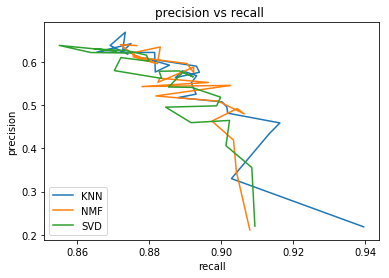

In [72]:
for i in range(len(model_names)):
    plt.plot(precisions[i], recalls[i],label = model_names[i])
    plt.title("precision vs recall ")
    plt.xlabel('recall')
    plt.ylabel("precision")
plt.legend(loc="lower left")

## Question 39 Answer: 

At the end of the plot, we can see that KNN has better recall performance, and at the start of the performance, SVD has better percisions. The general trend is decreasing percision with increased recall. The result of 3 models show same trend, which indicates that when t is small, percision is good, but rather low recall. And at high t, percision is low, but better recall. 
